In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_feature = 784

x_train, x_test = tf.reshape(x_train, [-1, num_feature]), tf.reshape(x_test, [-1, num_feature])
x_train = x_train / 255
x_test = x_test / 255

2022-07-27 13:39:41.722920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-27 13:39:42.709695: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6476 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:03:00.0, compute capability: 7.5
2022-07-27 13:39:42.710272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6647 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:04:00.0, compute capability: 7.5


In [7]:
from tensorflow.keras import Model, layers

class NeuralNet(Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(10)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            x = tf.nn.softmax(x)

        return x

In [8]:
neural_net = NeuralNet()

In [9]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

In [15]:
lr = 0.01
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=False)
        loss = cross_entropy_loss(pred, y)

    parameters = neural_net.trainable_variables
    gradients = g.gradient(loss, parameters)
    optimizer.apply_gradients(zip(gradients, parameters))

In [11]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 60
display_epoch = 4

for epo in range(1, epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)

    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print(f'epoch : {epo}, loss : {loss.numpy()}, acc : {acc.numpy()}')

epoch : 4, loss : 1.6627073287963867, acc : 0.800000011920929
epoch : 8, loss : 1.6011881828308105, acc : 0.875
epoch : 12, loss : 1.6766879558563232, acc : 0.7900000214576721
epoch : 16, loss : 1.6076949834823608, acc : 0.8700000047683716
epoch : 20, loss : 1.6024621725082397, acc : 0.875
epoch : 24, loss : 1.592091679573059, acc : 0.875
epoch : 28, loss : 1.6532245874404907, acc : 0.824999988079071
epoch : 32, loss : 1.617949366569519, acc : 0.8450000286102295
epoch : 36, loss : 1.602638602256775, acc : 0.875
epoch : 40, loss : 1.6348998546600342, acc : 0.8199999928474426
epoch : 44, loss : 1.6335264444351196, acc : 0.8399999737739563
epoch : 48, loss : 1.6265674829483032, acc : 0.8399999737739563
epoch : 52, loss : 1.6053473949432373, acc : 0.8600000143051147
epoch : 56, loss : 1.615364670753479, acc : 0.8450000286102295
epoch : 60, loss : 1.6104583740234375, acc : 0.8600000143051147


In [20]:
pred = neural_net(x_test)
print("Test Accuracy : ", accuracy(pred, y_test).numpy())

Test Accuracy :  0.8467


Using keras api

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_feature = 784

x_train = x_train / 255
x_test = x_test / 255

In [33]:
layer1 = Flatten(input_shape=(28,28))
layer2 = Dense(128, activation='relu')
layer3 = Dense(128, activation='relu')
layer4 = Dense(10)

In [34]:
mlp = Sequential([layer1, layer2, layer3, layer4])

In [35]:
mlp.compile(optimizer=tf.keras.optimizers.SGD(0.01),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [36]:
result = mlp.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6326 - accuracy: 0.8341
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2448 - accuracy: 0.9301
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2104 - accuracy: 0.9392
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1851 - accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1654 - accuracy: 0.9525
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1491 - accuracy: 0.9573
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1357 - accuracy: 0.9612
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1241 - accuracy: 0.9649
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.114

In [37]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9639


[0.11912359297275543, 0.9639000296592712]

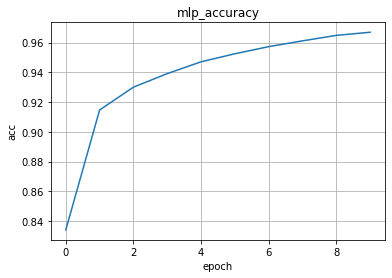

In [38]:
plt.plot(result.history['accuracy'])
plt.title('mlp_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()